In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\hp\Documents\owid-covid.csv")

# Filter to keep only countries (remove global aggregates)
df = df[df['continent'].notna()]

# Convert date safely (handles mixed formats like "1/3/2020" or "2020-03-01")
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)

# Preview the result
print(df[['location', 'date', 'new_cases']].head())




      location       date  new_cases
0  Afghanistan 2020-02-24          5
1  Afghanistan 2020-02-25          0
2  Afghanistan 2020-02-26          0
3  Afghanistan 2020-02-27          0
4  Afghanistan 2020-02-28          0


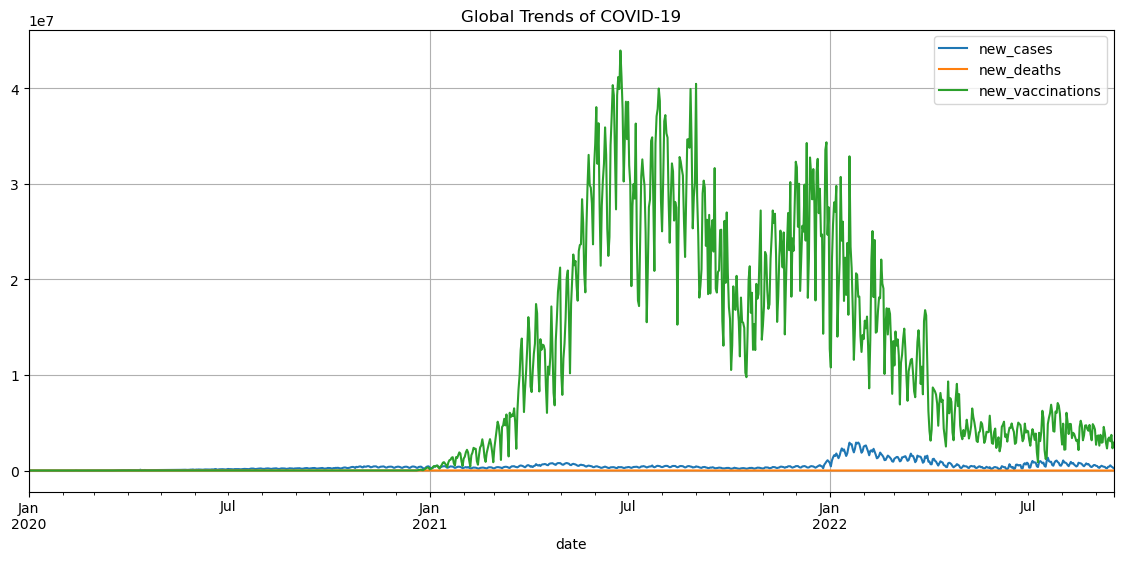

In [7]:
global_df = df.groupby('date')[['new_cases', 'new_deaths', 'new_vaccinations']].sum().reset_index()
global_df.plot(x='date', figsize=(14,6), title='Global Trends of COVID-19')
plt.grid(True)


<Axes: xlabel='total_cases', ylabel='location'>

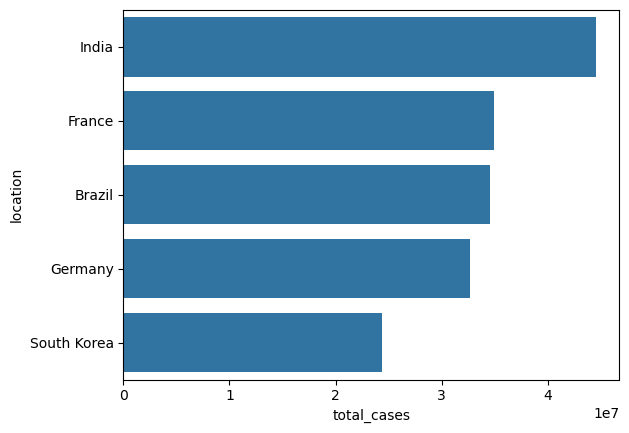

In [8]:
latest = df[df['date'] == df['date'].max()]
top5 = latest.sort_values('total_cases', ascending=False).head(5)
sns.barplot(x='total_cases', y='location', data=top5)


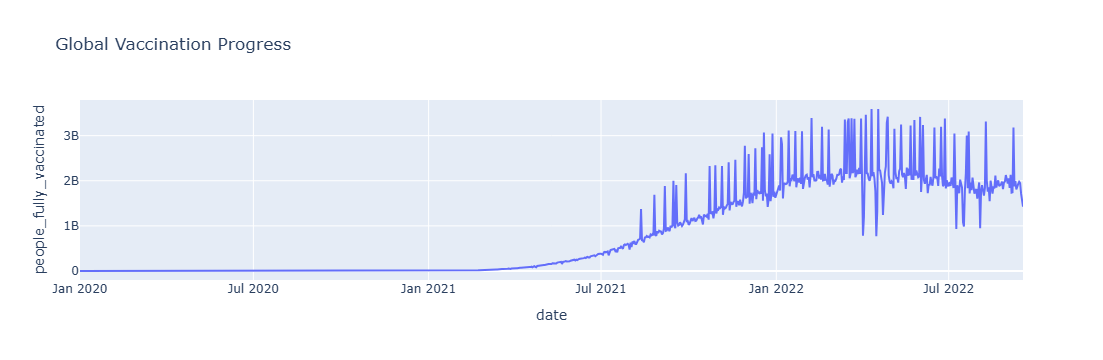

In [10]:
vacc_df = df.groupby(['date'])['people_fully_vaccinated'].sum().reset_index()
px.line(vacc_df, x='date', y='people_fully_vaccinated', title='Global Vaccination Progress')


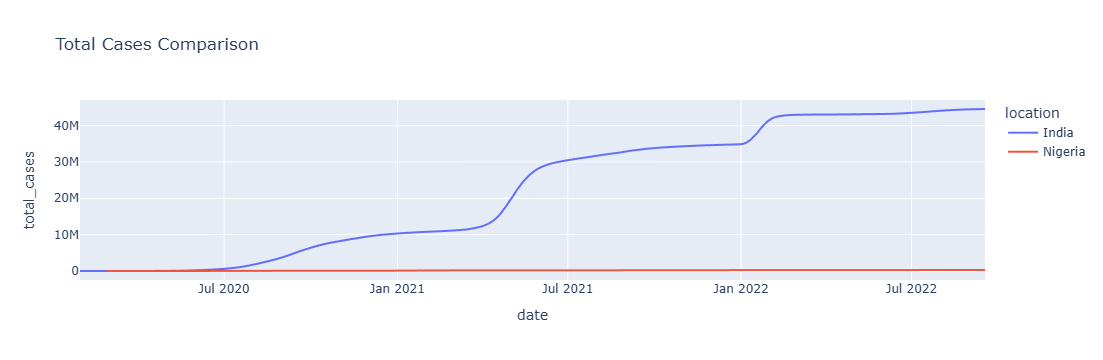

In [11]:
countries = ['Nigeria', 'United States', 'India']
compare_df = df[df['location'].isin(countries)]
px.line(compare_df, x='date', y='total_cases', color='location', title='Total Cases Comparison')


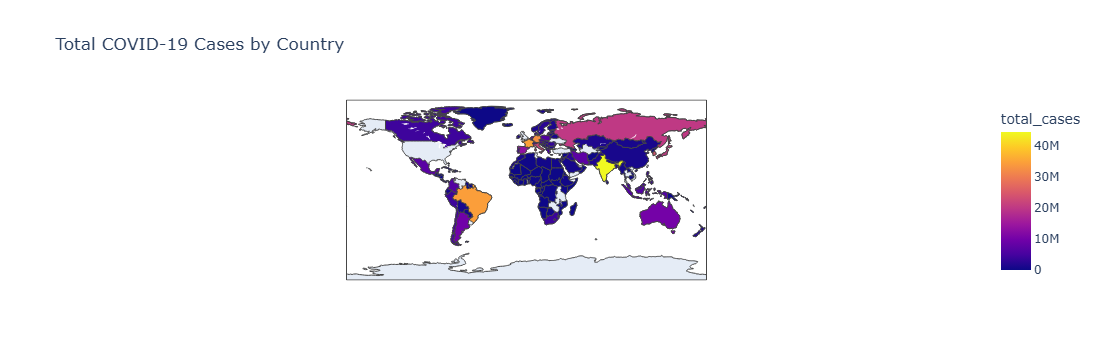

In [12]:
latest = latest[latest['iso_code'].str.len() == 3]  # Only countries
fig = px.choropleth(latest, locations='iso_code', color='total_cases',
                    hover_name='location', title='Total COVID-19 Cases by Country')
fig.show()
